In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df= pd.read_csv("student_mat.csv")
df=pd.get_dummies(df,drop_first=True)

In [4]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


In [5]:
df["G3"]

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [6]:
x=df.drop("G3",axis=1)

In [7]:
y=df["G3"]

In [8]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [14]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------- ----- 1.6/1.8 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)

   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   ---------------------------------------- 0/2 [joblib]
   -------------------------------

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
model=LinearRegression()

In [27]:
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import 

In [29]:
r2_score(y_test,y_pred)

0.7241341236974019

In [35]:
mean_absolute_error(y_test,y_pred)

1.6466656197147518

In [30]:
mean_squared_error(y_test,y_pred)

5.656642833231225

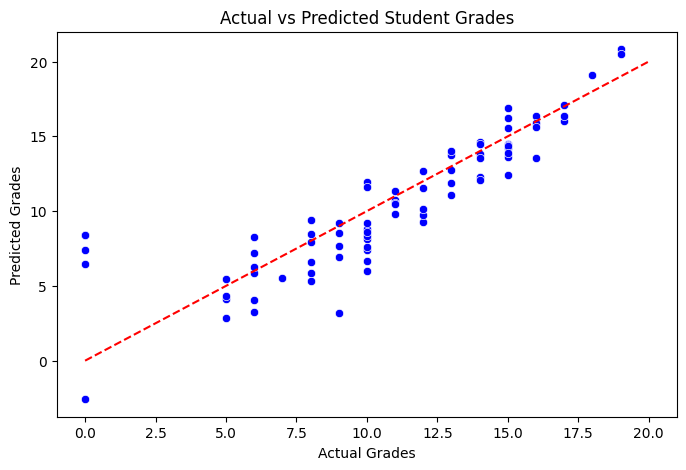

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color="blue")
plt.plot([0, 20], [0, 20], '--r')  # Reference line (perfect predictions)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Student Grades")
plt.show()

In [58]:
# Create a DataFrame of features and their coefficients
coeff_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_
})

coeff_df['abs_coef'] = coeff_df['Coefficient'].abs()
top_features = coeff_df.sort_values(by='abs_coef', ascending=False).head(5)
top_features

,Feature,Coefficient,abs_coef
14,G2,0.957772,0.957772
33,schoolsup_yes,0.785652,0.785652
28,reason_home,-0.611901,0.611901
36,activities_yes,-0.517500,0.517500
24,Fjob_health,0.481242,0.481242


In [62]:
# Assume X.columns is all training features
user_input_dict = {feature: 0 for feature in x.columns}  # default all to 0

# Ask only top features from user
top_5 = ['G1', 'G2', 'failures', 'studytime', 'absences']
for feature in top_5:
    val = float(input(f"Enter value for {feature}: "))
    user_input_dict[feature] = val

# Convert to DataFrame
user_df = pd.DataFrame([user_input_dict])

# Predict
predicted_grade = model.predict(user_df)
print(f"\n🎓 Predicted Final Grade (G3): {predicted_grade[0]:.2f}")


Enter value for G1:  67
Enter value for G2:  45
Enter value for failures:  0
Enter value for studytime:  8
Enter value for absences:  2



🎓 Predicted Final Grade (G3): 55.34
